<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 2 / NOTE 2*

---

# Central Limit Theorem

## 🏆 학습 목표 
- 큰 수의 법칙에 대해 설명할 수 있습니다.
- 중심 극한 정리에 대해 설명할 수 있습니다.
- 신뢰 구간에 대해 설명 할 수 있습니다.
---

이 노트는 아래의 구성으로 이뤄져 있습니다.
- **Part 0. Introduction**  
  0-1. 기획 배경  

- **Part 1. 기술 통계 vs 추리 통계**  

- **Part 2. 표본 분포 (Sampling Distribution)**  
  2-1. Boostrapping 테크닉 
  2-2. 표본 분포 with sample size 10  
  2-3. 표본 분포 with sample size 100 

- **Part 3. 큰 수의 법칙 (Law of Large Numbers)**
- **Part 4. 중심 극한 정리 (Central Limit Theorem)**  
- **Part 5. 신뢰 구간 (Confidence Interval)**  

# **Part 0. Introduction**
<img width='500' src='https://i.imgur.com/ZDERxGQ.png'>

## **0-1. 기획 배경**

모든 데이터 분석은 통계에서 출발합니다. <br> 
통계는 기본적으로 `추론(inference)`을 통해 샘플 데이터를 발생시킨 `실제 세계(population)`를 설명하는 과정으로 <br>
이것은 통계의 본질인 바로 **데이터로부터 의미를 찾는 것**입니다. 

우리는 이번 노트에서 데이터 분석에 필요한 통계 지식에 대해 배워보도록 합니다! 




# **Part 1. 기술 통계 vs 추리 통계**

먼저, `모집단 (Population)`과 `표본 (Sample)`이 무엇인지 명확하게 이해하고 이 개념을 **`기술 통계 (Descriptive Statistics)`**와 **`추리 통계 (Inferential Statistics)`**에 적용하도록 합니다. 

- **모집단 이란?** <br>
  - 모집단은 `인구`라는 의미의 `Population` 입니다. <br>
  - 이때 모집단이란 일반적 의미의 인구가 아닌, 우리가 알고 싶어하는 또는 다루고 싶어하는 대상을 구성하는 모든 데이터라고 이해하시면 됩니다.  <br>
  - 이 모집을 구성하는 데이터를 설명하는 수치값이 **모수** 입니다. 모수에는 `모평균, 모분산, 모표준편차, 모비율, 모상관관계` 등이 있습니다. 이 모수는 굉장히 중요합니다. 왜냐하면 우리가 실제로 알고자 하는 것은 모집단의 데이터가 아닌 **모집단의 특성을 설명한는 모수** 이기 때문입니다. <br>
  - 하지만, 우리는 모집단에 대한 데이터를 모두 수집하는 것은 불가능합니다. 그렇다면 우리는 어떻게 모집단의 모수를 알 수 있을까요? ***표본을 추출해서 모집단의 모수를 추정할 수 있습니다.*** 

- **표본 이란?** <br>
  - 표본이란 모집단에서 추출된 모집단의 부분 집합 입니다. 
  - 모수가 모집단의 분포 특성을 설명하는 것처럼, 통계량이란 표본의 특성을 설명한는 값입니다. 통계량에는 `표본평균, 표본분산, 표본표준편차, 표본비율, 표본상관관계` 등이 있습니다. 

>⚠️ **그렇다면 모수와 통계량은 어떻게 다른 걸까요?** <br>
모수는 모집단이 변하지 않기 때문에 그 값이 변하지 않습니다. 반면, 통계량은 표본을 어떻게 추출하느냐에 따라 그 값이 변합니다. 

<br>

여러분들은 모집단과 표본에 대한 개념에 대해 익히셨습니다. 
이제 시나리오를 통해 **기술 통계**와 **추리 통계**에 대해 배워보도록 합니다. <br>
아래의 테이블에서 통계 용어들어 익숙해지고, 통계 개념을 실제 상황에 적용해 보도록 합니다.


- **용어 정리**

<img width='600' src='https://i.imgur.com/8Ld7eFg.png'>



- **시나리오**

> 모든 코드스테이츠 부트캠프 학생들 중 비전공자의 비율을 알고자 합니다. 이전 1기부터 현재 기수까지 모든 학생들 100,000 명에게 학부에서 데이터 관련 전공을 했는지를 물어보는 이메일을 보냈습니다. 하지만, 모든 학생들이 이 이메일에 답장하지 않았고 5,000명의 학생들에게 답장을 받았습니다. 그리고 이렇게 답장한 사람들 중 73% 가 비전공자라고 대답했습니다. 


우선 이 시나리오에서, 
- **모집단** 
  - 모든 코드스테이츠 부트캠프 학생들로 우리가 이메일을 보낸 100,000 명의 학생들을 말합니다.
- **표본** 
  - 우리의 이메일에 응답한 학생들로 우리가 가지고 있는 5,000개의 데이터를 말합니다.
- **통계치** 
  - 응답한 학생들의 비전공자 비율인 73% 로 우리가 가지고 있는 데이터의 설명, 묘사 하는 값을 말합니다.
- **모수** 
  - 모든 100,000 명의 학생들의 비전공자 비율로 이 값을 알기 위해서는 모든 부트캠프 학생들로부터 전공에 관한 정보를 필요로 하기 때문에 우리는 이 값을 모릅니다.
  - 이 값을 아는 것은 불가능하기에 우리는 우리가 가지고 있는 샘플의 통계치를 기반으로 이 모수에 대한 결론을 도출하게 되는데 이를 추론(inference) 이라고 합니다.
- **기술 통계** 
  - 우리가 가지고 있는 데이터인 5000명의 학생들의 전공에 관한 정보를 묘사, 설명하는 것을 말합니다. 방법에는 평균, 분산, 표준편차, 비율, 상관 관계 등이 있습니다. 
- **추리 통계** 
  - 모든 코드스테이츠 학생들의 전공에 관한 특징을 말합니다. 
  - 이때 오로지 5000명의 학생들만 응답을 하였고, 이 5,000명의 샘플 데이터를 이용하여 100,000명의 모든 부트캠프 학생들에 관한 결과를 도출하는 것을 추리 통계라고 합니다.  


# **Part 2. 표본 분포 (Sampling Distribution)**

<img width='600' src='https://i.imgur.com/VWyyAo2.png'>

**표본 분포**란 모집단에서 랜덤으로 추출한 샘플의 **통계량의 확률 분포 (Distribution of a Statsitics)**를 말합니다. <br> 
즉, 표본 분포란 모집단에서 추출한 샘플의 통계치의 분포를 말합니다. 
  
<br>

  - **표본 분포는 왜 중요한가**
    - 위에서 우리는 모집단의 모든 데이터를 가질 수 없기에 모수를 알 수 없으므로 우리가 가지고 있는 샘플을 이용해 모수를 추론해야 함을 배웠습니다.
    - 표본 분포는 우리가 가지고 있는 한정적인 데이터를 이용해 모수를 추론할 수 있도록 하기 때문에 중요합니다. 

<br>

  - **표본 분포 시행 방법**
    - 우리는 우리가 가지고 있는 샘플을 모집단이라 가정합니다. 그리고 이 모집단에서 랜덤으로 샘플을 추출하여 샘플의 평균값을 저장합니다. 이후 이 평균값들의 분포를 통해 모집단의 모수를 추론합니다. 즉, 우리가 가지고 있는 샘플에서 다시 샘플링을 시행하고 추출된 데이터의 평균값을 사용하여 모수를 추론하게 되는 것입니다.      

<br>

- **표본 분포 시나리오** <br>
  - 위에서 제시한 코드스테이츠 부트캠프 학생들의 비전공 비율 예시를 통해 
표본 분포에 대해 배워 보도록 합니다.
> 모든 코드스테이츠 학생들의 비전공자 비율에 대해 알고자 할 때, 우리는 5,000명의 학생들에 대한 정보만을 가지고 있습니다. 우리는 이 5,000명의 학생들이 모든 코드스테이츠 학생들인 모집단 (population)이라고 가정합니다. 그리고 이 모집단에서 우리는 샘플 (subset of data)을 계속적으로 추출하여 통계치를 계산하여 그 값을 저장합니다. 이 통계치들의 분포가 표본 분포입니다. 이때 우리는 추출하는 과정을 10,000번 시행하게 될 것이고 그러기에 우리는 10,000개의 평균값을 가지게 됩니다. 여기서 우리는 샘플을 추출할 때, 샘플의 개수를 10개일 때와 100개일 때의 표본 분포를 비교하도록 합니다.  

<br> 

- **표보 분포 코드 구현**  <br> 
   - 이를 구현하는 코드는 아래의 순서로 진행합니다. <br>
  >   **1.** numpy의 **random.choice** 메서드를 이용하여 population 에서 10개의 데이터를 추출합니다.<br>
  **2.** 10개의 데이터의 평균을 계산하여 리스트에 저장합니다.<br>
  **3.** 1번과 2번의 과정을 for loop을 이용하여 10,000번 반복합니다. 그러면 리스트에는 10,000번 추출된 10개의 데이터의 평균값이 저장됩니다.<br>
  **4.** 히스토그램을 이용해 평균값들의 분포를 확인합니다. 


In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
# 비전공자 비율이 78%인 5000명의 학생 데이터를 생성
import random

random.seed(10)

codestates_students = np.random.choice([0, 1], size=5000, p=[.22, .78])
codestates_students

array([1, 1, 1, ..., 1, 1, 0])

In [ ]:
# 데이터가 0과 1일때 평균은 비율과 같음
pop_ratio = codestates_students.mean()
pop_ratio

0.7784

In [ ]:
# 모집단의 분산
pop_var = codestates_students.var()
pop_var

0.17249344

In [ ]:
# 모집단의 표준편차 
pop_std = codestates_students.std()
pop_std

0.4153232957588582

In [ ]:
# 모집단의 평균 x (1-모집단의 평균)
pop_ratio*(1-pop_ratio)

0.17249344

> **🔎 해설** <br>
- 우리는 시나리오에 해당하는 비전공자의 비율이 78%인 5,000개의 학생 데이터를 생성하였습니다. 이 5,000개의 데이터 샘플은 코드스테이츠 부트캠프의 전체 학생인 **모집단**이라 가정합니다. 
- 0은 전공자 학생을 의미하고 1은 비전공자 학생을 의미합니다. 
- `pop_ratio` 변수는 모집단의 비전공자의 비율로 모집단의 평균이기도 합니다. 
  - 데이터가 0과 1로 이루어져 있을 때 데이터의 평균은 비율과 같습니다. 
- 모집단의 분산은 아래의 공식을 통해 구할 수 있음을  확인할 수 있습니다.
```
모집단의 분산 = 모집단의 평균 x (1 - 모집단의 평균) 
```

## **2-1. Boostrapping 테크닉**

<img width='600' src='https://i.imgur.com/eIPwygd.png'>

- **부트스트랩 이란**
  - 우리가 가지고 있는 5000명의 데이터를 우리의 모집단이라 가정한 뒤, <br>
이 모집단에서 **`for loop`**을 사용하여 샘플을 10,000번 추출하여 이 샘플들의 평균의 분포를 확인하도록 하는데, 이때 우리가 사용하는 테크닉이 바로 **`부트스트랩 (Boostrapping)`** 입니다. 부스트랩은 ***중복 추출을 허용하여 원하는 개수의 데이터를 추출하는 것***을 말합니다.

<br>

- **부트스트랩 구현 방법**
  - **for loop**을 사용하여 10,000번 iterations 돌립니다. 그리고 각 iteration 마다 **random.choice** 메서드를 이용하여 샘플을 추출하도록 합니다.

<br>

- **부스트랩의 장점**
  - 우리가 알고자 하는 것이 모집단의 모수이고, 이 모수를 더 잘 이해하기 위해 더 많은 데이터를 필요로 하지 않고 가지고 있는 데이터로 추정할 수 있는 점이 부스트랩 기법이 유용한 이유입니다.


> ⚠️ <br>
우리는 아래에서 부스트랩을 사용하여 표본 분포를 simulate하는데 이때 샘플의 개수를 **10개 추출**했을 때와 **100개 추출**했을 때의 차이에 주의하며 보도록 합니다.

## **2-2. 표본 분포 with sample size 10**

우리가 가정한 5,000명의 학생들에서 **10개의 데이터를 중복추출을 허용**하여 10,000번 추출해 평균값들의 분포를 확인하도록 합니다. <br>
이 분포는 **`샘플의 개수가 10개일 때의 표본 분포`**입니다.

> ⚠️ <br>
이 표본 분포의 `평균`, `분산`, `표준 편차`를 확인해 보도록 합니다.


In [ ]:
random.seed(10)

sample_of_10 = []

for _ in range(10000):
  sample = np.random.choice(codestates_students, 10, replace=True)
  sample_of_10.append(sample.mean())

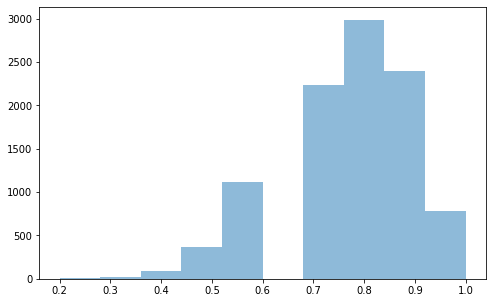

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(sample_of_10, alpha=.5);

In [ ]:
sample_of_10 = np.array(sample_of_10)

# 샘플 사이즈가 10개 일때 표본 분포의 평균
mean_of_10 = sample_of_10.mean()
mean_of_10

0.7794800000000001

In [ ]:
# 샘플 사이즈가 10개일 때 표본 분포의 분산
var_of_10 = sample_of_10.var()
var_of_10

0.017100929600000002

In [ ]:
# # 샘플 사이즈가 10개일 때 표본 분포의 표준편차
std_of_10 = sample_of_10.std()
std_of_10 

0.1307705226723515

> **🔎 해설** <br>
- 샘플 사이즈가 **10일 때** 표분 분포의 평균은 `0.779` 로 모집단의 평균인 `0.778`과 굉장히 비슷한 것을 알 수 있습니다.
- 하지만 이 표본 분포의 분산은 `0.017`로 모집단의 분산인 `0.17`에서 샘플 사이즈 `10`을 나눈 값인 것을 확인할 수 있습니다. 표본 분포의 분산은 모집단의 분산에서 표본의 크기를 나눈 값이기 때문입니다.
```
표본 분포의 분산 = 모집단의 평균 x (1 - 모집단의 평균) / 샘플 사이즈
```


## **2-3. 표본 분포 with sample size 100**

위에서 우리는 한번 샘플을 추출할 때마다 10개의 데이터를 꺼냈습니다. <br>
이번에는 샘플을 추출할 때마다 **100개의 데이터를 추출**하여 그 평균값의 분포를 확인해 보도록 하겠습니다. <br>
이 분포는 **`샘플의 개수가 100개일 때의 표본 분포`**입니다.

> ⚠️ <br>
이 표본 분포의 `평균`, `분산`, `표준 편차`를 샘플 사이즈를 10으로 추출했을 때의 표본 분포의 평균, 분산, 표준 편차와 비교하도록 합니다. <br>
그리고 샘플링하는 데이터 개수의 차이에 따라 어떠한 변화가 있는지 주의하여 보도록 합니다!

In [ ]:
random.seed(10)

sample_of_100 = []

for _ in range(10000):
  sample = np.random.choice(codestates_students, 100, replace=True)
  sample_of_100.append(sample.mean())

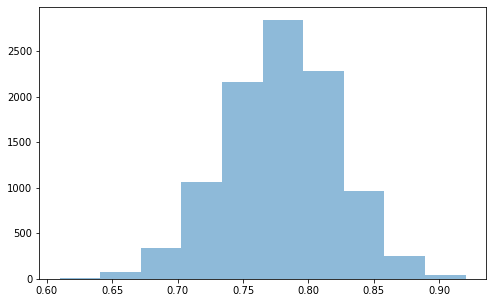

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(sample_of_100, alpha=.5);

In [ ]:
sample_of_100 = np.array(sample_of_100)

# 샘플 사이즈가 100개일 때 표본 분포의 평균
mean_of_100 = sample_of_100.mean()
mean_of_100

0.7785479999999999

In [ ]:
# 샘플 사이즈가 100개일 때 표본 분포의 분산
var_of_100 = sample_of_100.var()
var_of_100

0.0017191516960000002

In [ ]:
# 샘플 사이즈가 100개일 때 표본 분포의 표준편차
std_of_100 = sample_of_100.std()
std_of_100 

0.04146265423245357

> **🔎 해설** <br>
- 데이터의 개수가 **100개일 때**의 표본 분포의 평균은 `0.778`으로 데이터의 개수가 10개일 때 표본 분포의 평균보다 더 **모집단의 평균에 가까워진 것을 확인**할 수 있습니다.
- 이 표본 분포의 분산은 `0.0017`로 모집단의 분산 `0.17`에서 **`샘플의 개수 100`**을 나눈 것과 같습니다. 이는 위에서 우리가 찾은 결과와 일맥상통한 것을 알 수 있습니다. 

> ⚠️ <br>
아래에서는 두 표본 분포를 비교해 보도록 합니다!

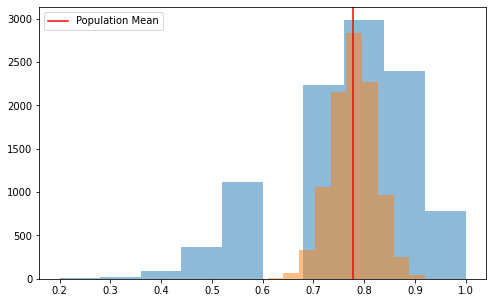

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(sample_of_10, alpha=.5)
plt.hist(sample_of_100, alpha=.5)
plt.axvline(x=pop_ratio, c='red', label = 'Population Mean')
plt.legend();

> **🔎 해설** <br>
추춸한 샘플 사이즈가 **10인 경우**와 **100인 경우**의 표분 분포 비교
- 샘플 사이즈가 커질수록 표본 분포가 더 좁아지는 것을 알 수 있습니다. 이는 샘플 사이즈가 많아질수록 분산이 줄어드는 것을 의미합니다. 
  - 이는 위에서 우리가 찾은 관계인 표본 분포의 분산은 모집단의 분포에 샘플 사이즈로 나눈 것과 같습니다.
```
표본 분포의 분산 = 모집단의 평균 x (1 - 모집단의 평균) / 샘플 사이즈
```
- 두 표본 분포는 모집단의 모수를 중심으로 위치해 있습니다. 두 분포의 평균은 모두 모집단의 평균과 근사하며, 샘플 사이즈가 더 많아질 수록 모집단의 모수에 더 가까워지는 것을 알 수 있습니다. 


> **💡 Tip**  
위에서 확인한 모집단에서 표본을 추출할 때 **표본의 크기가 커지면 표본의 평균은 모집단의 모수와 같아질 확률이 높아진다는 것**은 수학적 이론 ***큰 수의 법칙 (Law of Large Numbers)***에 근거하고 있습니다. 다음으로 이 법칙에 대해 배워 보도록 합니다!

# **Part 3. 큰 수의 법칙 (Law of Large Numbers)**

**큰 수의 법칙**이란, <br>
샘플 사이즈가 커질수록 샘플의 통계치는 모집단의 모수에 가까워진다는 이론입니다.  

즉, 여러분들께서 모집단의 평균을 알고자 할 때, 이를 모집단에서 추출한 샘플들의 평균으로 추정할 수 있고 이때 **추출한 샘플 사이즈가 클수록 모집단의 평균을 측정하기에 좋다**라는 것입니다. 

아래에서 이를 데이터로 확인해 보도록 합니다. 
우리는 랜덤으로 데이터를 생성한 뒤 이를 모집단이라 가정합니다. <br>
그리고 이 모집단에서 **샘플 사이즈를 3, 10, 30 개씩 추출**하여 평균값을 계산하고 이를 모집단의 평균과 비교해보도록 합니다.


In [ ]:
np.random.seed(0)

pop = [] 

for i in range(5000):
  pop.append(np.random.beta(1,9))

In [ ]:
# 모집단의 모수 확인
pop = np.array(pop)

pop_mean = pop.mean()

pop_mean

0.09899610609722446

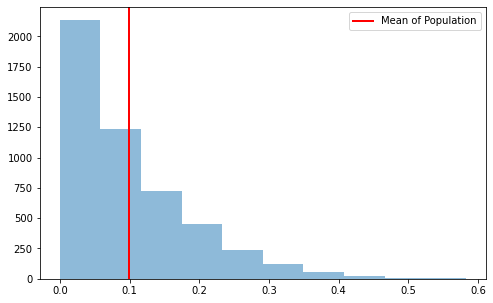

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(pop, alpha=0.5)
plt.axvline(pop_mean, c='red', lw=2, label='Mean of Population')
plt.legend();

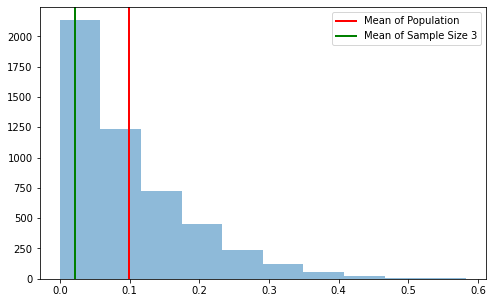

In [ ]:
# 3개의 데이터를 뽑아 평균을 계산하고 이를 모집단의 평균과 비교
np.random.seed(1)
sample1 = np.random.choice(pop, 3)
sample_mean_3 = sample1.mean()
sample_mean_3

plt.figure(figsize=(8,5))
plt.hist(pop,alpha=0.5)
plt.axvline(pop_mean, c='red', lw=2, label='Mean of Population')
plt.axvline(sample_mean_3, c='green', lw=2, label = 'Mean of Sample Size 3')
plt.legend();

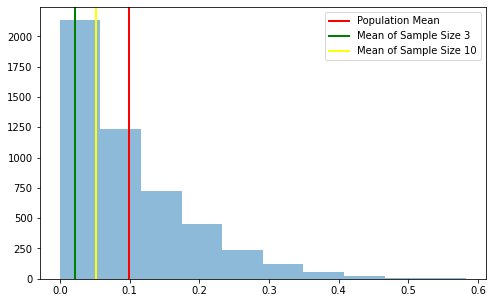

In [ ]:
# 10개의 데이터를 뽑아 평균값을 계산하고 이를 모집단의 평균과 비교
np.random.seed(1)

sample2 = np.random.choice(pop, 10)
sample_mean_10 = sample2.mean()
sample_mean_10

plt.figure(figsize=(8,5))
plt.hist(pop,alpha=0.5)
plt.axvline(pop_mean, c='red', lw=2, label='Population Mean')
plt.axvline(sample_mean_3, c='green', lw=2, label='Mean of Sample Size 3')
plt.axvline(sample_mean_10, c='yellow', lw=2, label = 'Mean of Sample Size 10')
plt.legend();

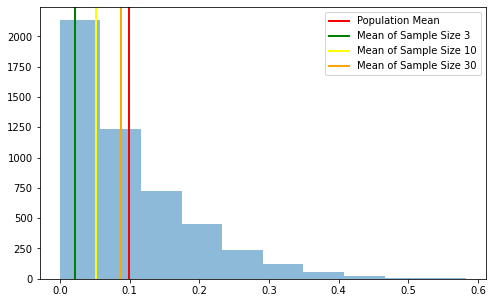

In [ ]:
# 30개의 데이터를 뽑아 평균값을 계산하고 이를 모집단의 평균과 비교
np.random.seed(1)

sample3 = np.random.choice(pop, 30)
sample_mean_30 = sample3.mean()
sample_mean_30

plt.figure(figsize=(8,5))
plt.hist(pop,alpha=0.5)
plt.axvline(pop_mean, c='red', lw=2, label='Population Mean')
plt.axvline(sample_mean_3, c='green', lw=2, label='Mean of Sample Size 3')
plt.axvline(sample_mean_10, c='yellow', lw=2, label = 'Mean of Sample Size 10')
plt.axvline(sample_mean_30, c='orange', lw=2, label = 'Mean of Sample Size 30')
plt.legend();

> **🔎 해설** <br>
- 위에서 알 수 있듯이 **샘플 사이즈가 커질수록 샘플의 평균값이 모집단의 모수에 가까워지는 것**을 알 수 있습니다. 
- 이 **큰 수의 법칙**을 우리는 부스트랩 테크닉을 이용하여 표본 분포를 simulate할때 적용하게 되면 유용합니다. 
  - 예를 들어, 모집단의 데이터 개수가 5,000개이고 여기서 샘플링을 하고자 할 때 **모집단의 데이터 개수만큼 (5,000개) 중복허용을 통해 샘플링**을 하게 되면, 표본 분포의 평균은 모집단의 모수에 가장 가까운 값을 얻을 수 있게 됩니다. 
  - 아래의 코드는 이를 구현한 것이고, **`df.shape[0]`**은 모집단의 데이터 개수를 말합니다.

> ```
mean_list = []
for _ in range(10000):
    sample = np.random.choice(df, df.shape[0])
    mean_list.append(sample.mean())
```


# **Part 4. 중심 극한 정리 (Central Limit Theorem)**

**중심 극한 정리**란, <br>
**모집단의 분포에 상관없이** 임의의 분포에서 추출된 ***표본들의 평균의 분포는 정규분포를 이룬다***는 이론입니다. 

> **💡 Tip** <br>
중심 극한 정리에서 주의해야 할 점은 표본을 추출할 때 **충분한 샘플 사이즈**를 추출해야 한다는 점입니다. <br> 충분한 데이터 개수의 샘플을 추출하여 평균값의 표본 분포를 시뮬레이트하면 분포는 **정규분포**를 따르게 됩니다.

하지만 중심 극한 정리는 모든 통계치에 적용되는 것은 아닙니다. <br>
예시로 우리는 평균값을 이용했고 중심 극한 정리는 아래의 통계치에 적용될 수 있습니다.

- **샘플의 평균**, $\overline{x}$
- **샘플의 비율**, $p$
- **두 샘플 평균의 차이**, $\overline{x_{1}} - \overline{x_{2}}$
- **두 샘플 비율의 차이**, $p_{1} - p_{2}$

> ⚠️ <br>
아래에서 샘플 사이즈를 `3개씩 추출`한 평균의 표본 분포와, `100개씩 추출`한 평균의 표본 분포를 비교해보도록 합니다. <br>
**샘플 사이즈가 증가**했을 때의 표본 분포는 어떠한 변화를 보이는지 확인해 보세요! 





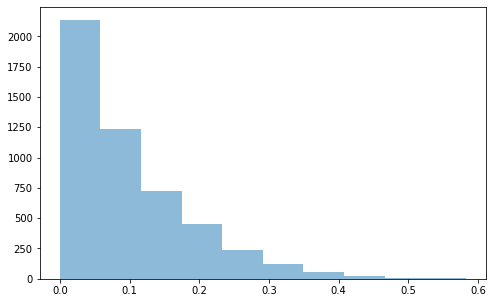

In [ ]:
# 위에서 랜덤으로 시뮬레이트한 모집단을 사용합니다.
plt.figure(figsize=(8,5))  
plt.hist(pop, alpha=0.5);

In [ ]:
# 모집단의 평균 확인
mean = pop.mean()
mean

0.09899610609722446

In [ ]:
# 모집단의 분산 확인
var = pop.var()
var

0.007988710969307195

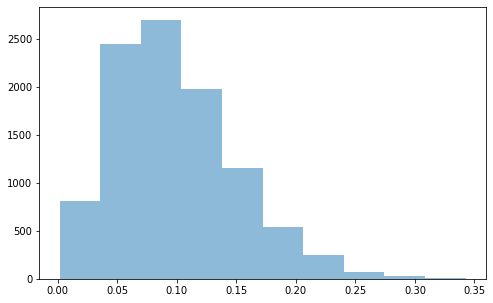

In [ ]:
# 샘플을 추출할 때마다 3개의 데이터를 추출하여 평균값을 계산하고 그 평균들의 표본 분포를 simulate
np.random.seed(1)

means_size_3 = []

for _ in range(10000):
    sample = np.random.choice(pop, 3)
    means_size_3.append(sample.mean())

plt.figure(figsize=(8,5))    
plt.hist(means_size_3, alpha=0.5);

In [ ]:
# 샘플 개수가 3개일 때의 표본 분포의 평균 확인
means_size_3 = np.array(means_size_3)

means_size_3_mean = means_size_3.mean()
means_size_3_mean

0.09878506072951315

In [ ]:
# 샘플 개수가 3개일 때의 표본 분포의 분산 확인
means_size_3_var = means_size_3.var()
means_size_3_var

0.002629329525481775

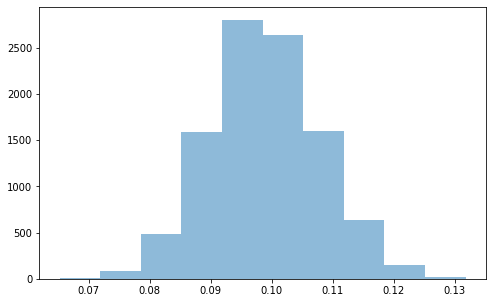

In [ ]:
# 샘플을 추출할 때마다 100개의 데이터를 추출하여 평균값을 계산하고 그 평균들의 표본 분포를 simulate
np.random.seed(1)

means_size_100 = []

for _ in range(10000):
    sample = np.random.choice(pop, 100)
    means_size_100.append(sample.mean())

plt.figure(figsize=(8,5))      
plt.hist(means_size_100, alpha=0.5);

In [ ]:
# 샘플 개수가 100개일 때 표본 분포의 평균 확인
means_size_100 = np.array(means_size_100)

means_size_100_mean = means_size_100.mean()
means_size_100_mean

0.0989483901939587

In [ ]:
# 샘플 개수가 100개일 때 표본 분포의 분산 확인
means_size_100_var = means_size_100.var()
means_size_100_var

7.983287317974839e-05

> **🔎 해설** <br>

- `샘플 사이즈를 3`으로 표본의 평균 분포를 시뮬레이트한 경우 skewedness가 조금은 나아졌지만 **여전히 right-skewed 되어 있음**을 알 수 있습니다. 
- 하지만 `샘플 사이를 100`으로 증가한 후, 표본의 평균 분포는 어떠한 skewedness 없이 **완전한 정규 분포를 이루고 있음**을 알 수 있습니다.
- 즉, 우리의 **모집단이 heavily right-skewed 되어 있는 분포**를 이루고 있었음에도 이 모집단에서 충분한 개수의 샘플을 추출해 그것의 평균의 표본 분포를 시뮬레이트 하게 되면 ***표본 분포는 정규분포를 띄게 됩니다.*** 그리고 이것을 바로 **중심 극한 정리**라 합니다.
- 두 표본 분포의 평균값을 확인한 결과, 우리가 위에서 확인했듯이 두 **표본 분포의 평균값은 모집단의 평균 근처에 존재**하고 있습니다. 
- 두 표본 분포의 분산은 샘플 사이가 많아질수록 작아지는 것 또한 확인할 수 있습니다.

> ⚠️ <br>
중심 극한 정리는 모든 표본 분포에 적용되는 것은 아닙니다. <br>
그러면 언제 중심 극한 정리가 적용되지 않을까요? <br>
위에서 확인했듯, **충분한 샘플 사이즈**와 함께 정규분포를 가집니다. 



# **Part 5. 신뢰 구간 (Confidence Interval)**

<img width='500' src='https://i.imgur.com/K3ZtB9D.png'>

마지막으로 **신뢰 구간**에 대해 공부해보도록 합니다.

우리는 위에서 알 수 없는 모집단의 모수를 측정하기 위해, 한정적인 샘플을 통해 어떻게 추론할 것인지 **평균의 표본 분포**와 **부트스트랩**등의 통계적 기법을 이용해 모집단의 모수에 가장 근접한 값을 찾는 방법에 대해 배웠습니다.  

여기에 우리는 **신뢰 구간**을 더하도록 합니다. <br>
우리가 찾고자 하는 모집단의 모수는 알 수 없기에 만약 모수의 값을 어떠한 특정 값 (a single estimate)으로 추정한다면 많은 불확실성을 초래합니다. 그러기에 어떠한 특정 값을 추정 또는 예측하기보다는 **모수가 포함되어 있을 구간을 확률과 함께 제공**하여 불확실성을 줄이고, 우리가 찾은 모수의 신뢰성을 가늠하고자 합니다. 그러기에 우리는 어떠한 모수에 대한 특정 값을 예측하는 것이 아닌 이 모수를 포함하고 있을 구간을 제공하는데 이를 **신뢰구간** 이라고 합니다.  

우리는 아래에서 부스트랩 테크닉을 사용하여 평균의 표본 분포를 빌드한 뒤, <br> 
***모집단의 모수를 포함할 확률이 95%가 되는 구간***을 찾도록 합니다.  

In [ ]:
sample_of_100 = np.array(sample_of_100)

In [ ]:
sample_of_100_mean = sample_of_100.mean()
sample_of_100_mean

0.7785479999999999

In [ ]:
lower, upper = np.percentile(sample_of_100, 2.5), np.percentile(sample_of_100, 97.5) 
lower, upper

(0.69, 0.86)

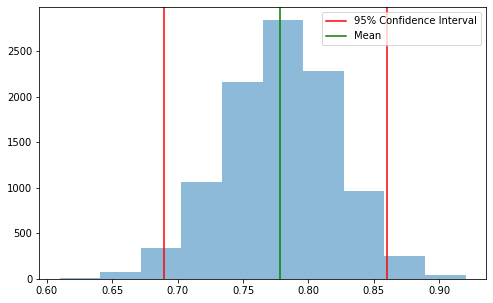

In [ ]:
plt.figure(figsize=(8,5)) 
plt.hist(sample_of_100, alpha=0.5)
plt.axvline(lower, c='red', label='95% Confidence Interval')
plt.axvline(upper, c='red')
plt.axvline(sample_of_100_mean, c='green', label='Mean')
plt.legend();

> **🔎 해설** <br>
- 위에서 여러분들은 모든 코드스테이츠 부트캠프 학생들의 비전공자 비율에 대한 95% 신뢰 구간을 빌드했습니다. 
- 우리의 모수인 모든 코드스테이츠 부트캠프 학생들의 비전공자 비율은 **69%에서 86% 사이에 있을거라 95% 확신**합니다.